#financial_fraud_detection_dataset

In [22]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
fraude_df = pd.read_csv('financial_fraud_detection_dataset.csv')

In [24]:
fraude_df

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,T5099995,2023-11-17T23:20:29.746144,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23T11:23:20.659686,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18T00:52:34.527092,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25T04:32:13.609837,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203


In [25]:
fraude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

###**Traducción del encabezado de las columnas**

In [26]:
#renombrando columnas
fraude_df.rename(columns={
'transaction_id': 'ID de transacción',
'timestamp':  'fecha y hora',
'sender_account':	'cuenta emisora',
'receiver_account':'cuenta receptora',
'amount':'monto',
'transaction_type':'tipo de transacción',
'merchant_category':	'categoría de comerciante',
'location':	'ubicación',
'device_used':	'dispositivo utilizado',
'is_fraud':	'es fraude (sí/no)',
'fraud_type':	'tipo de fraude',
'time_since_last_transaction':	'tiempo desde la última transacción',
'spending_deviation_score':	'puntuación de desviación de gasto',
'velocity_score':	'puntuación de velocidad (de transacciones)',
'geo_anomaly_score':	'puntuación de anomalía geográfica',
'payment_channel':	'canal de pago',
'ip_address':	'dirección IP',
'device_hash':	'huella digital del dispositivo'
}, inplace=True)

In [27]:
# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [28]:
# --- Parte 1: Exploración básica ---
print("\n--- Resumen de columnas ---")
print(fraude_df.info())


--- Resumen de columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   ID de transacción                           object 
 1   fecha y hora                                object 
 2   cuenta emisora                              object 
 3   cuenta receptora                            object 
 4   monto                                       float64
 5   tipo de transacción                         object 
 6   categoría de comerciante                    object 
 7   ubicación                                   object 
 8   dispositivo utilizado                       object 
 9   es fraude (sí/no)                           bool   
 10  tipo de fraude                              object 
 11  tiempo desde la última transacción          float64
 12  puntuación de desviación de gasto           float64
 13

In [29]:
print("\n--- Primeras filas ---")
print(fraude_df.head())


--- Primeras filas ---
  ID de transacción                fecha y hora cuenta emisora  \
0           T100000  2023-08-22T09:22:43.516168      ACC877572   
1           T100001  2023-08-04T01:58:02.606711      ACC895667   
2           T100002  2023-05-12T11:39:33.742963      ACC733052   
3           T100003  2023-10-10T06:04:43.195112      ACC996865   
4           T100004  2023-09-24T08:09:02.700162      ACC584714   

  cuenta receptora    monto tipo de transacción categoría de comerciante  \
0        ACC388389   343.78          withdrawal                utilities   
1        ACC944962   419.65          withdrawal                   online   
2        ACC377370  2773.86             deposit                    other   
3        ACC344098  1666.22             deposit                   online   
4        ACC497887    24.43            transfer                utilities   

  ubicación dispositivo utilizado  es fraude (sí/no) tipo de fraude  \
0     Tokyo                mobile              Fals

In [30]:
print("\n--- Transacciones totales y fraudulentas ---")
print(fraude_df["es fraude (sí/no)"].value_counts())


--- Transacciones totales y fraudulentas ---
es fraude (sí/no)
False    4820447
True      179553
Name: count, dtype: int64


In [31]:
print("\n--- Valores nulos ---")
print(fraude_df.isnull().sum())


--- Valores nulos ---
ID de transacción                                   0
fecha y hora                                        0
cuenta emisora                                      0
cuenta receptora                                    0
monto                                               0
tipo de transacción                                 0
categoría de comerciante                            0
ubicación                                           0
dispositivo utilizado                               0
es fraude (sí/no)                                   0
tipo de fraude                                4820447
tiempo desde la última transacción             896513
puntuación de desviación de gasto                   0
puntuación de velocidad (de transacciones)          0
puntuación de anomalía geográfica                   0
canal de pago                                       0
dirección IP                                        0
huella digital del dispositivo                      0
dtype

In [32]:
# --- Parte 2: Estadísticas con NumPy ---
amount_mean = np.mean(fraude_df["monto"])
amount_std = np.std(fraude_df["monto"])
print(f"\nMonto promedio: {amount_mean:.2f}, Desviación estándar: {amount_std:.2f}")


Monto promedio: 358.93, Desviación estándar: 469.93


In [33]:
fraud_amount_mean = fraude_df[fraude_df["es fraude (sí/no)"] == True]["monto"].mean()
nonfraud_amount_mean = fraude_df[fraude_df["es fraude (sí/no)"] == False]["monto"].mean()
print(f"Monto promedio FRAUDE: {fraud_amount_mean:.2f}, NO FRAUDE: {nonfraud_amount_mean:.2f}")

Monto promedio FRAUDE: 358.53, NO FRAUDE: 358.95


¿Qué significa esto?

   amount_mean: Es el monto promedio de todas las transacciones en el dataset.

        Por ejemplo: si ves Monto promedio: 456.72, significa que en promedio, las transacciones tienen un valor de 456.72 unidades monetarias.

   amount_std: Es la desviación estándar del monto, que indica cuánto varían los montos respecto al promedio.

        Si la desviación estándar es alta (por ejemplo, 1200.56), quiere decir que hay mucha diferencia entre los montos: algunas transacciones pueden ser muy pequeñas y otras muy grandes.

  ¿Cómo interpretarlo?

   Monto promedio bajo + desviación estándar alta → Hay muchas transacciones pequeñas y unas pocas muy grandes (posiblemente anómalas).

   Monto promedio alto + desviación estándar baja → Las transacciones son consistentemente grandes y estables.

   Puedes comparar estos valores con los de transacciones fraudulentas vs no fraudulentas para detectar patrones de riesgo.



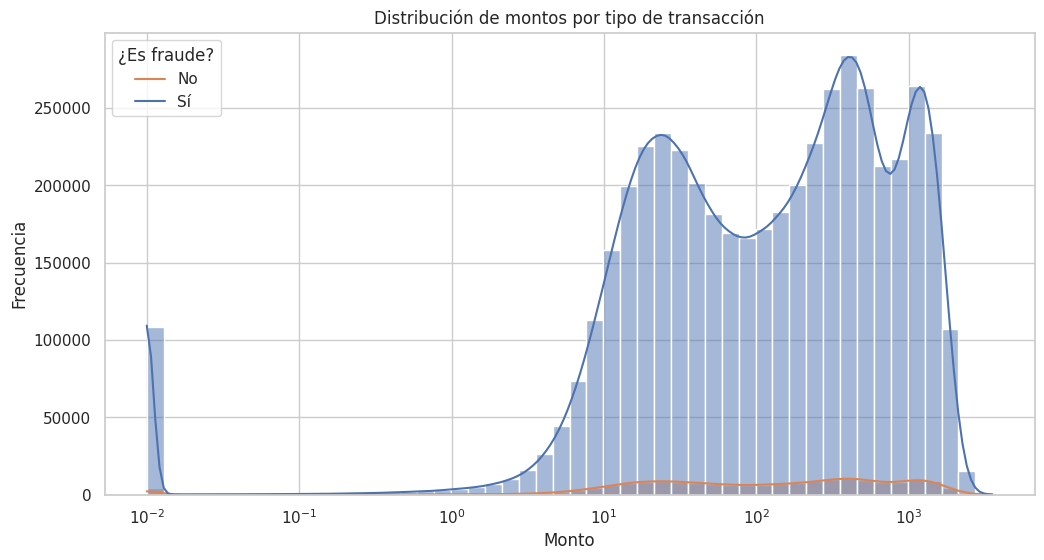

In [34]:
# --- Parte 3: Visualizaciones ---
# Histograma de montos por tipo de transacción
plt.figure()
sns.histplot(data=fraude_df, x="monto", hue="es fraude (sí/no)", bins=50, log_scale=(True, False), kde=True)
plt.title("Distribución de montos por tipo de transacción")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.legend(title="¿Es fraude?", labels=["No", "Sí"])
plt.show()

  ¿Qué muestra el gráfico?

   Eje X: Monto de la transacción (amount)

   Eje Y: Frecuencia (cantidad de transacciones que tienen ese rango de monto)

   Color:

        Un color representa las transacciones no fraudulentas

        Otro color representa las fraudulentas

     hue="is_fraud": Separa los datos por si son fraudes o no.

     log_scale=(True, False): Escala logarítmica en el eje X para manejar la gran variación de montos (útil si hay muchos valores pequeños y pocos muy grandes).

     kde=True: Añade una línea de densidad (curva suavizada) encima del histograma.

  ¿Cómo interpretarlo?

   Si los fraudes se concentran en un rango específico de montos, lo verás como un pico del color de "fraude" en una zona específica del eje X.

   Si las transacciones legítimas están más distribuidas y los fraudes más concentrados, puede ser una señal útil para detectar patrones.

   Si la curva KDE de fraudes tiene una forma distinta a la de no fraudes, puedes usarlo como insight para un modelo predictivo.

  Ejemplo de interpretación:

   Si ves que los fraudes ocurren con mayor frecuencia en montos entre $1,000 y $5,000, mientras que las transacciones legítimas son mayormente pequeñas, entonces ese rango se vuelve sospechoso.



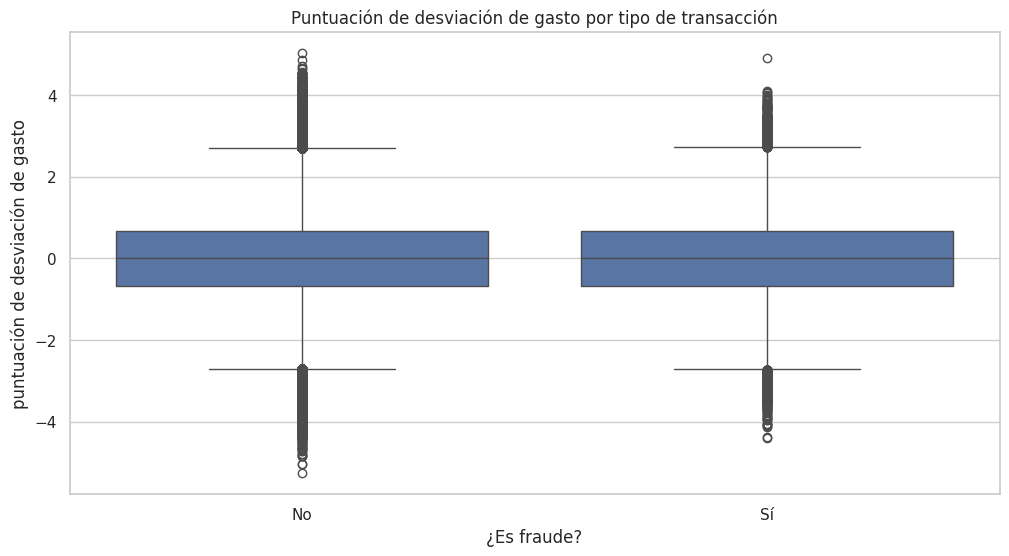

In [35]:
# Boxplot de spending_deviation_score
plt.figure()
sns.boxplot(data=fraude_df, x="es fraude (sí/no)", y="puntuación de desviación de gasto")
plt.title("Puntuación de desviación de gasto por tipo de transacción")
plt.xlabel("¿Es fraude?")
plt.ylabel("puntuación de desviación de gasto")
plt.xticks([0, 1], ["No", "Sí"])
plt.show()


Es un diagrama de caja (boxplot) que compara el spending_deviation_score entre transacciones fraudulentas y no fraudulentas.
  ¿Qué muestra este boxplot?

Cada caja resume la distribución del spending_deviation_score (una medida de cuánto se desvía el gasto de lo habitual) según si la transacción es fraude (Sí) o no lo es (No).

   Línea central (dentro de la caja): Mediana del score.

   Bordes de la caja: Primer y tercer cuartil (Q1 y Q3).

   Bigotes (whiskers): Extienden hasta valores razonables (dentro de 1.5 × rango intercuartílico).

   Puntos fuera de los bigotes: Outliers o valores atípicos.

 ¿Cómo interpretarlo?

   Si las cajas de fraudes y no fraudes son visiblemente diferentes en altura, posición o rango, el score spending_deviation_score es útil para distinguir entre ambos casos.

     Por ejemplo:

        Si las transacciones fraudulentas tienen una mediana más alta o más baja que las no fraudulentas,

        O si tienen más outliers extremos,

        Entonces esta variable puede ser importante en un modelo de detección de fraudes.



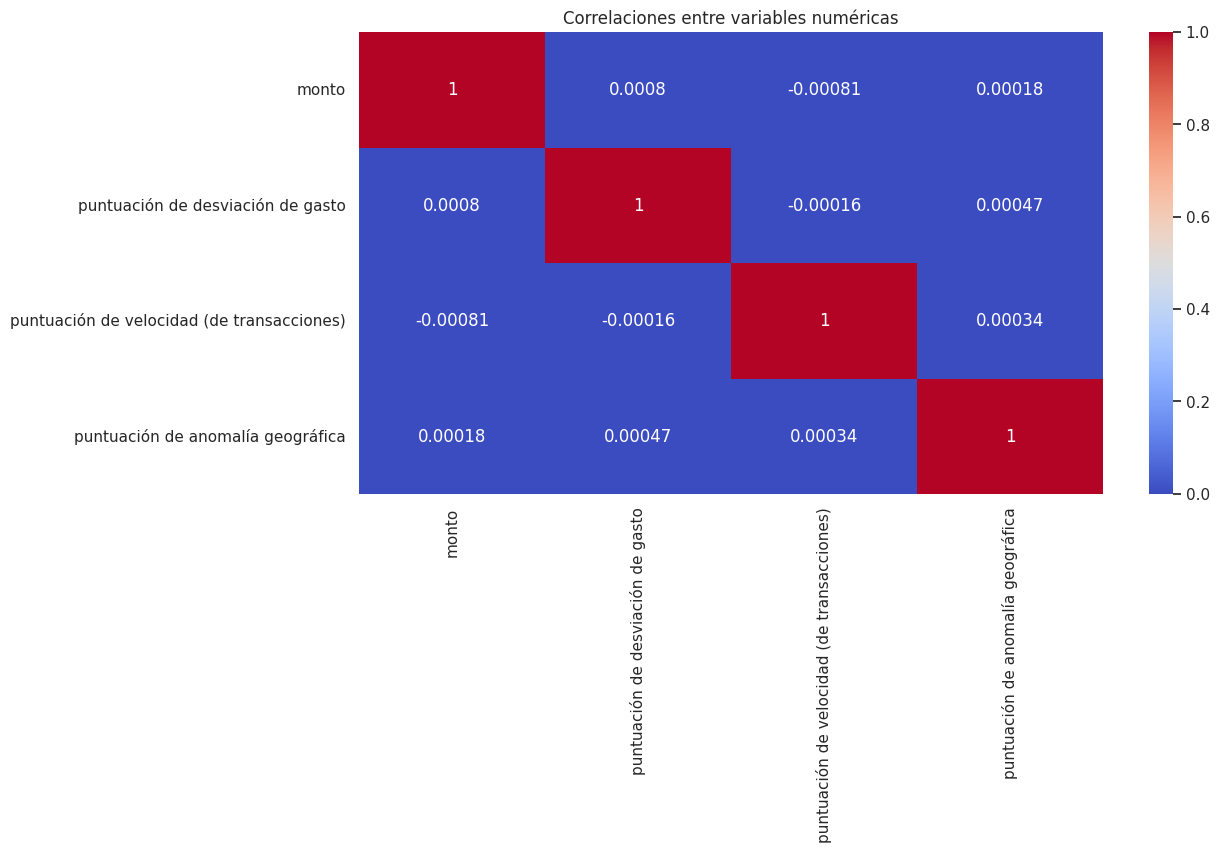

In [36]:
# Heatmap de correlaciones
plt.figure()
cols = ["monto", "puntuación de desviación de gasto", "puntuación de velocidad (de transacciones)", "puntuación de anomalía geográfica"]
correlation = fraude_df[cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables numéricas")
plt.show()

📊 Significado del gráfico:

Este mapa de calor (heatmap) muestra cómo están relacionadas las variables numéricas seleccionadas entre sí, mediante la correlación de Pearson, que mide la fuerza y dirección de una relación lineal.
🔢 Valores posibles de correlación:

  +1 → correlación positiva perfecta (cuando una sube, la otra también).

  0 → sin relación lineal.

   –1 → correlación negativa perfecta (cuando una sube, la otra baja).

   ¿Cómo interpretar este heatmap?

     Cada celda muestra el valor de correlación entre dos variables.

     El color indica la intensidad:

        🔴 rojo = correlación positiva fuerte

        🔵 azul = correlación negativa fuerte

        ⚪ blanco = débil o nula

     annot=True permite ver los números exactos.

 Ejemplo práctico (supón que ves esto):
	 amount	spending_deviation_score	velocity_score	geo_anomaly_score
 amount	1.00	0.25	0.05	0.02
spending_deviation	0.25	1.00	0.65	-0.10
velocity_score	0.05	0.65	1.00	-0.30
geo_anomaly_score	0.02	-0.10	-0.30	1.00
Interpretación:

     spending_deviation_score y velocity_score están moderadamente correlacionados (0.65): cuando alguien se desvía mucho del gasto normal, también suele hacer transacciones más rápidas o inusuales.

     geo_anomaly_score tiene correlación negativa débil con los demás: su comportamiento es algo independiente.

     amount no está muy correlacionado con ninguna otra variable ⇒ el monto por sí solo no predice bien estos scores.

  ¿Por qué es útil?

     Te ayuda a detectar relaciones entre variables que podrían causar multicolinealidad si usas modelos como regresión.

     Puedes descubrir nuevas combinaciones útiles para detección de fraudes.



In [37]:
# --- Parte 4: Análisis por categorías ---
# Categoría con más fraudes
print("\n--- Fraudes por categoría de comercio ---")
print(fraude_df[fraude_df["es fraude (sí/no)"] == True]["categoría de comerciante"].value_counts().head())



--- Fraudes por categoría de comercio ---
categoría de comerciante
entertainment    22573
other            22556
grocery          22516
travel           22503
retail           22453
Name: count, dtype: int64


 ¿Qué hace este bloque de código?

Este código analiza el campo merchant_category (categoría del comercio) únicamente para las transacciones fraudulentas (is_fraud == True) y muestra las categorías donde ocurrieron más fraudes.
  ¿Qué significa?

   Te dice en qué tipo de comercios (por ejemplo, online, grocery, utilities, etc.) ocurre con más frecuencia el fraude.

   El método .value_counts().head() ordena de mayor a menor y muestra las 5 categorías principales.

  Ejemplo de salida posible:

--- Fraudes por categoría de comercio ---
online       5340
grocery      4890
utilities    3125
retail       2784
restaurant   2541
Name: merchant_category, dtype: int64

  Esto nos dice que:

     La mayoría de fraudes ocurrieron en la categoría online, seguida por grocery (tiendas de abarrotes), etc.

     Esto puede indicar que ciertos tipos de comercio son más vulnerables al fraude (como pagos en línea).

  ¿Por qué es útil?

     Puedes enfocar la vigilancia o medidas antifraude en esas categorías.

     Puede alimentar un modelo de detección de fraudes (como variable categórica con peso).

     Sirve para presentar hallazgos a áreas de seguridad, compliance o negocio.



/tmp/ipython-input-38-2085216937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_categories.values, y=fraud_categories.index, palette="Reds_r")


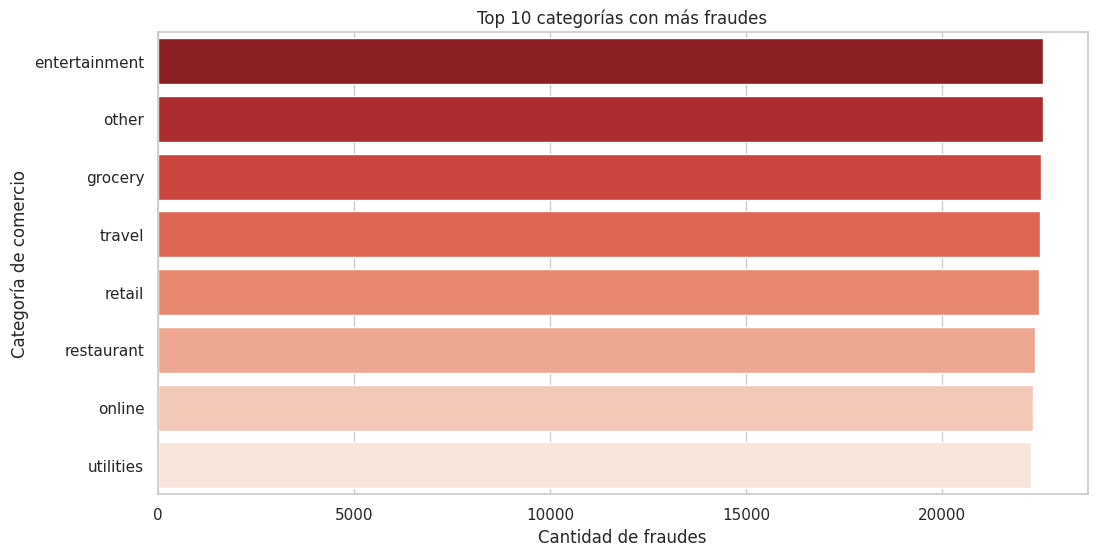

In [38]:
# Gráfico de barras: categorías con más fraudes
plt.figure()
fraud_categories = fraude_df[fraude_df["es fraude (sí/no)"] == True]["categoría de comerciante"].value_counts().head(10)
sns.barplot(x=fraud_categories.values, y=fraud_categories.index, palette="Reds_r")
plt.title("Top 10 categorías con más fraudes")
plt.xlabel("Cantidad de fraudes")
plt.ylabel("Categoría de comercio")
plt.show()


 Qué aporta este gráfico?

     Visualiza de forma clara en qué tipos de comercios ocurren más fraudes.

     Es útil para presentaciones, análisis de riesgo o priorización de medidas antifraude.



In [39]:
# Dispositivo más común en fraudes
print("\n--- Fraudes por dispositivo usado ---")
print(fraude_df[fraude_df["es fraude (sí/no)"] == True]["dispositivo utilizado"].value_counts())



--- Fraudes por dispositivo usado ---
dispositivo utilizado
atm       45217
pos       44852
web       44807
mobile    44677
Name: count, dtype: int64


In [40]:
# Ubicaciones con más fraudes
print("\n--- Fraudes por ubicación ---")
print(fraude_df[fraude_df["es fraude (sí/no)"] == True]["ubicación"].value_counts().head())


--- Fraudes por ubicación ---
ubicación
Toronto      22501
London       22478
Singapore    22461
New York     22460
Sydney       22458
Name: count, dtype: int64


<Axes: xlabel='puntuación de velocidad (de transacciones)', ylabel='puntuación de desviación de gasto'>

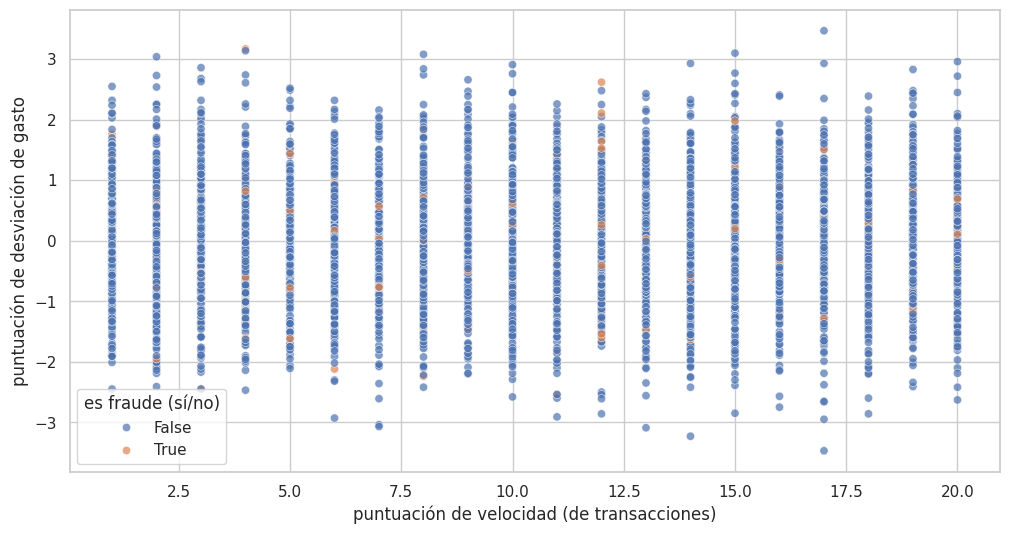

In [41]:
# --- Extra: Scatter plot con color por fraude ---
plt.figure()
sns.scatterplot(
    data=fraude_df.sample(5000),
    x="puntuación de velocidad (de transacciones)",
    y="puntuación de desviación de gasto",
    hue="es fraude (sí/no)",
    alpha=0.7)

📊 ¿Qué tipo de gráfico es?

Es un scatter plot (diagrama de dispersión), donde:

     Cada punto representa una transacción.

     Se grafican 5000 muestras aleatorias para no saturar el gráfico.

     El color del punto indica si la transacción fue fraudulenta (is_fraud=True) o no (is_fraud=False).

     El eje X representa el velocity_score (qué tan rápido o frecuente es el comportamiento).

     El eje Y muestra el spending_deviation_score (cuánto se desvía el gasto de lo habitual).

   ¿Cómo interpretar el gráfico?

     Los puntos se agrupan en zonas del gráfico según los patrones de comportamiento.

     Si ves que los fraudes (probablemente en rojo o naranja) tienden a concentrarse en una región específica del gráfico, por ejemplo en valores altos de velocity_score y spending_deviation_score, eso sugiere que las transacciones rápidas y con gasto inusual son más propensas al fraude.

     Si no hay una separación clara, eso indica que estos dos scores por sí solos no bastan para diferenciar fraudes — pero podrían ser útiles como parte de un modelo más complejo.

   ¿Para qué sirve este gráfico?

     Ayuda a visualizar relaciones no lineales entre variables numéricas.

     Es útil para detectar patrones de fraude visualmente.

     También puede ayudarte a decidir si incluir estas variables en un modelo de clasificación.



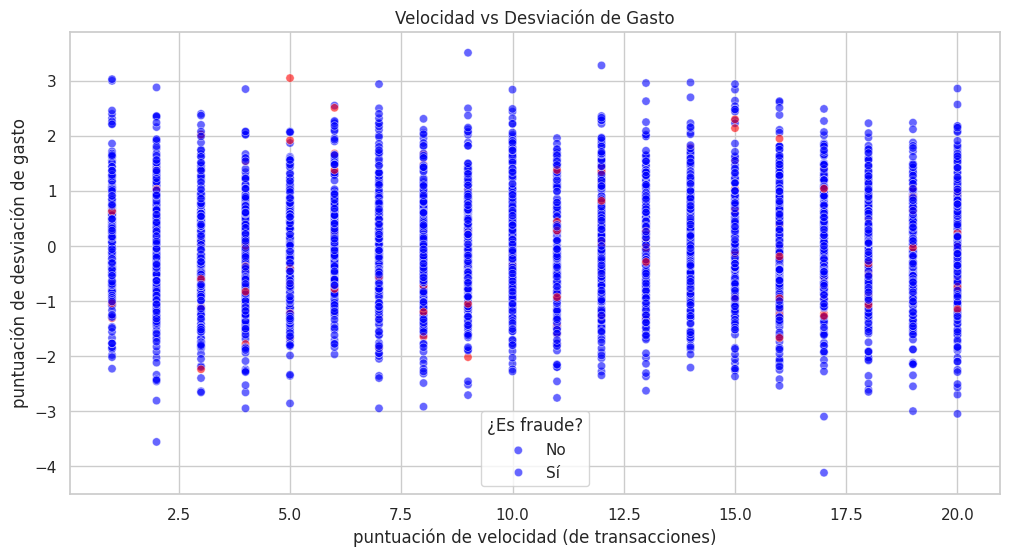

In [42]:
# Scatter plot con limpieza previa
df_clean = fraude_df[["puntuación de velocidad (de transacciones)", "puntuación de desviación de gasto", "es fraude (sí/no)"]].dropna()
plt.figure()
sns.scatterplot(
    data=df_clean.sample(5000),
    x="puntuación de velocidad (de transacciones)",
    y="puntuación de desviación de gasto",
    hue="es fraude (sí/no)",
    alpha=0.6,
    palette={False: "blue", True: "red"}
)
plt.title("Velocidad vs Desviación de Gasto")
plt.xlabel("puntuación de velocidad (de transacciones)")
plt.ylabel("puntuación de desviación de gasto")
plt.legend(title="¿Es fraude?", labels=["No", "Sí"])
plt.show()


Este gráfico de dispersión (scatter plot) que aparece en la sección Extra: Scatter plot con color por fraude tiene como objetivo visualizar la relación entre dos variables numéricas y su relación con el fraude:

  Interpretación:

     Eje X (velocity_score): mide la rapidez o frecuencia de las transacciones en un período de tiempo. Valores más altos indican actividad inusualmente rápida.

     Eje Y (spending_deviation_score): indica cuánto se desvía el gasto actual respecto al comportamiento esperado. Valores altos (positivos o negativos) pueden ser señal de comportamiento atípico.

     Color del punto (hue="is_fraud"):

         🔵 Azul: transacciones no fraudulentas

         🔴 Rojo: transacciones fraudulentas

  ¿Qué puedes descubrir?

     Si los puntos rojos (fraudes) se agrupan en una región específica del gráfico (por ejemplo, alto velocity_score y alto spending_deviation_score), eso indica que ciertos patrones de comportamiento están asociados al fraude.

     Si los colores están mezclados sin un patrón claro, significa que estas dos variables por sí solas no son suficientes para identificar fraudes, pero aún pueden ser útiles dentro de un modelo de detección más completo.

  ¿Por qué es útil este gráfico?

     Es una herramienta de análisis exploratorio para identificar patrones sospechosos.

     Puede ayudarte a decidir qué variables incluir en un modelo de machine learning.

     Sirve como apoyo visual para entender el comportamiento de usuarios normales vs. fraudulentos.

